In [1]:
import scanpy as sc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import decoupler as dc

In [2]:
adata = sc.read_h5ad("/home/roger/send_data/combined_filtered_landscape.h5ad")

In [3]:
new_adata = sc.AnnData(X=adata.raw.X, var=adata.raw.var, obs=adata.obs)

In [38]:
new_adata

AnnData object with n_obs × n_vars = 130700 × 22035
    obs: 'n_genes', 'n_counts', 'mt_count', 'mt_frac', 'doublet_scores', 'predicted_doublets', 'xist_logn', 'Ygene_logn', 'xist_bin', 'Ygene_bin', 'sex_adata', 'biosample_id', 'cellid', 'RBG', 'SLXid', 'index', '10xsample_description', 'sex_mixed', 'sex_meta', 'mouse_id', 'sortedcells', 'expected_cells_10x', 'cellranger_cellsfound', 'chemistry', 'tom', 'expdate', 'batch', 'timepoint_tx_days', 'start_age', 'sample_id', 'countfile', 'S_score', 'G2M_score', 'phase', 'leiden', 'SLX', 'plate_sorted', 'plate_rearranged', 'well_sorted', 'well_rearranged', 'set_index', 'CI_index', 'mouse_platelabel', 'sort_method', 'sample.name', 'population', 'sex', 'countfolder', 'batch_plate_sorted', 'data_type', 'sex_combined', 'longname', 'anno_man', 'leiden_DM', 'HSCscore', 'nn_HSCscore', 'isroot', 'dpt_pseudotime'

In [9]:
#Check distribution, but this is normalized or scaled or whatever data
plt.hist(new_adata.X[0, : ].toarray())


KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x7fab509909d0> (for post_execute), with arguments args (),kwargs {}:



KeyboardInterrupt



Error in callback <function flush_figures at 0x7faa506783a0> (for post_execute), with arguments args (),kwargs {}:



KeyboardInterrupt



In [16]:
# From 0 ranges to 8.2
print(new_adata.X.min())
print(new_adata.X.max())

0.0
8.23806


In [17]:
# Somehow differs from adata..... i suppose is the further pre-processing steps.... 
print(adata.X.min())
print(adata.X.max())

-3.7160907
8.23806


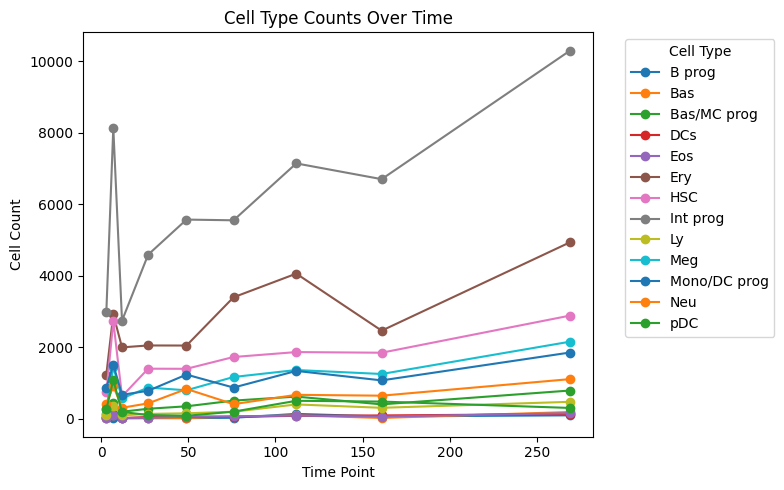

In [21]:
import matplotlib.pyplot as plt
# Convert the relevant data to a DataFrame for easier handling
df = new_adata.obs[['anno_man', 'timepoint_tx_days']]

# Get the value counts as a pivot table
heatmap_data = df.value_counts().unstack(fill_value=0)
# Assuming heatmap_data is already created
# Reset index to make 'anno_man' a column
line_data = heatmap_data.reset_index()

# Melt the DataFrame to long format for easier plotting with seaborn or matplotlib
line_data = line_data.melt(id_vars='anno_man', var_name='timepoint', value_name='count')

# Plot each cell type as a line
plt.figure(figsize=(8, 5))
for cell_type in line_data['anno_man'].unique():
    subset = line_data[line_data['anno_man'] == cell_type]
    plt.plot(subset['timepoint'], subset['count'], marker='o', label=cell_type)

# Customize the plot
plt.title("Cell Type Counts Over Time")
plt.xlabel("Time Point")
plt.ylabel("Cell Count")
plt.legend(title="Cell Type", bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.tight_layout()
plt.show()


In [25]:
genes_of_interest = ["Vdr", "Cyp27a1", "Cyp27b1", "Cyp2r1"]
genes_int = new_adata[:, new_adata.var_names.isin(genes_of_interest)]

In [31]:
genes_int

View of AnnData object with n_obs × n_vars = 130700 × 4
    obs: 'n_genes', 'n_counts', 'mt_count', 'mt_frac', 'doublet_scores', 'predicted_doublets', 'xist_logn', 'Ygene_logn', 'xist_bin', 'Ygene_bin', 'sex_adata', 'biosample_id', 'cellid', 'RBG', 'SLXid', 'index', '10xsample_description', 'sex_mixed', 'sex_meta', 'mouse_id', 'sortedcells', 'expected_cells_10x', 'cellranger_cellsfound', 'chemistry', 'tom', 'expdate', 'batch', 'timepoint_tx_days', 'start_age', 'sample_id', 'countfile', 'S_score', 'G2M_score', 'phase', 'leiden', 'SLX', 'plate_sorted', 'plate_rearranged', 'well_sorted', 'well_rearranged', 'set_index', 'CI_index', 'mouse_platelabel', 'sort_method', 'sample.name', 'population', 'sex', 'countfolder', 'batch_plate_sorted', 'data_type', 'sex_combined', 'longname', 'anno_man', 'leiden_DM', 'HSCscore', 'nn_HSCscore', 'isroot', 'dpt_pseudotime'

In [36]:
# Let's choose timepoint 269
adata_269 = new_adata[new_adata.obs["timepoint_tx_days"] == 269]

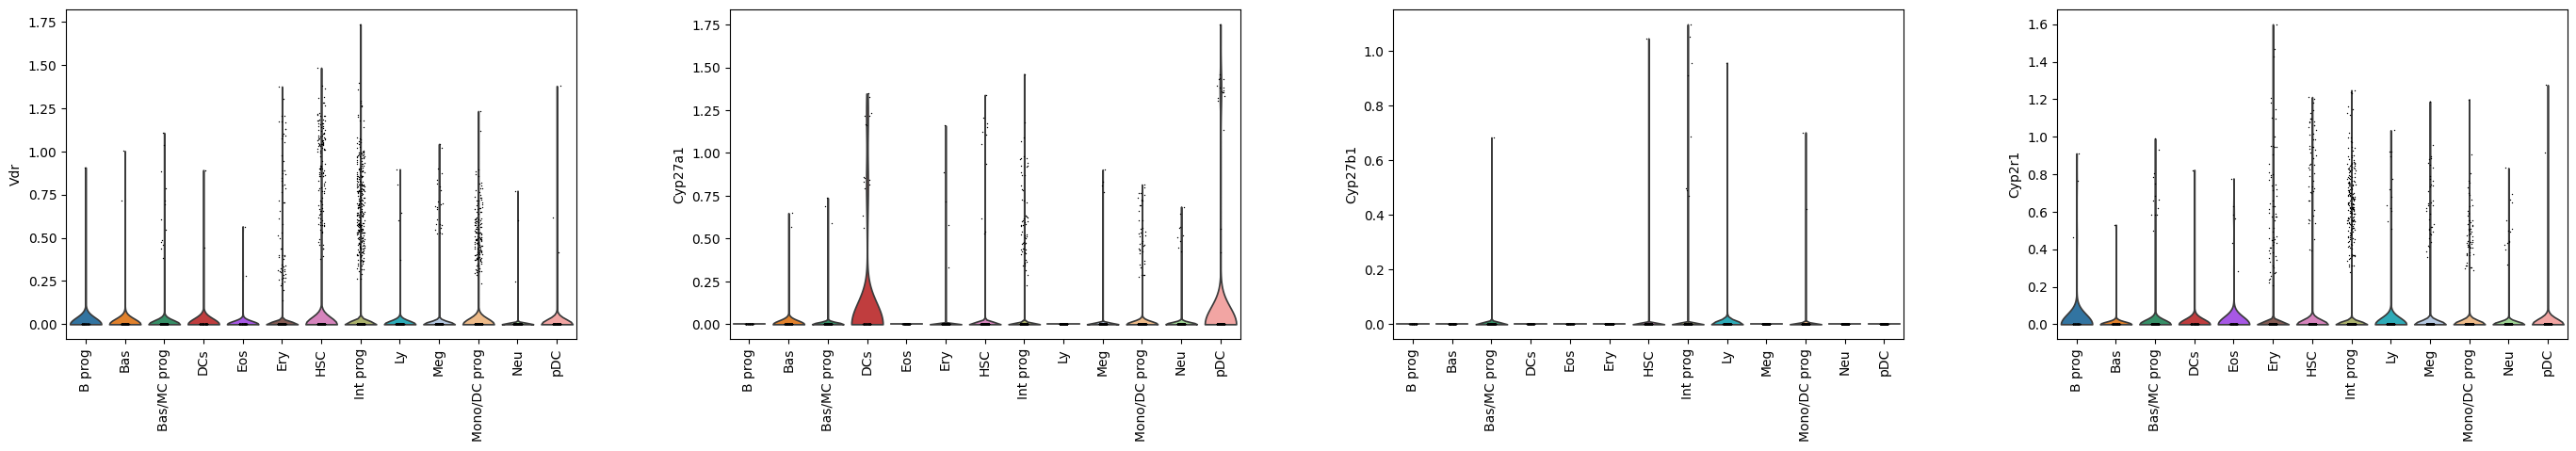

In [15]:
sc.pl.violin(adata_269, keys=["Vdr", "Cyp27a1", "Cyp27b1", "Cyp2r1"], groupby="anno_man", rotation=90)

In [38]:
# Basic pre-processing steps
adata_269.layers["counts"] = adata_269.X.copy()
sc.pp.normalize_total(adata_269)
sc.pp.log1p(adata_269)
sc.pp.highly_variable_genes(adata, n_top_genes=5000)
sc.tl.pca(adata_269)
sc.pp.neighbors(adata_269, n_neighbors=12, n_pcs=50)
sc.tl.umap(adata_269)
sc.tl.leiden(adata_269, resolution=1)

/tmp/ipykernel_129517/2619389987.py:2: ImplicitModificationWarning: Setting element `.layers['counts']` of view, initializing view as actual.
  adata_269.layers["counts"] = adata_269.X.copy()
/home/roger/anaconda3/envs/celloracle_env/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:276: RuntimeWarning: invalid value encountered in log
  dispersion = np.log(dispersion)
/home/roger/anaconda3/envs/celloracle_env/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:383: UserWarning: `n_top_genes` > number of normalized dispersions, returning all genes with normalized dispersions.
  warnings.warn(msg, UserWarning)


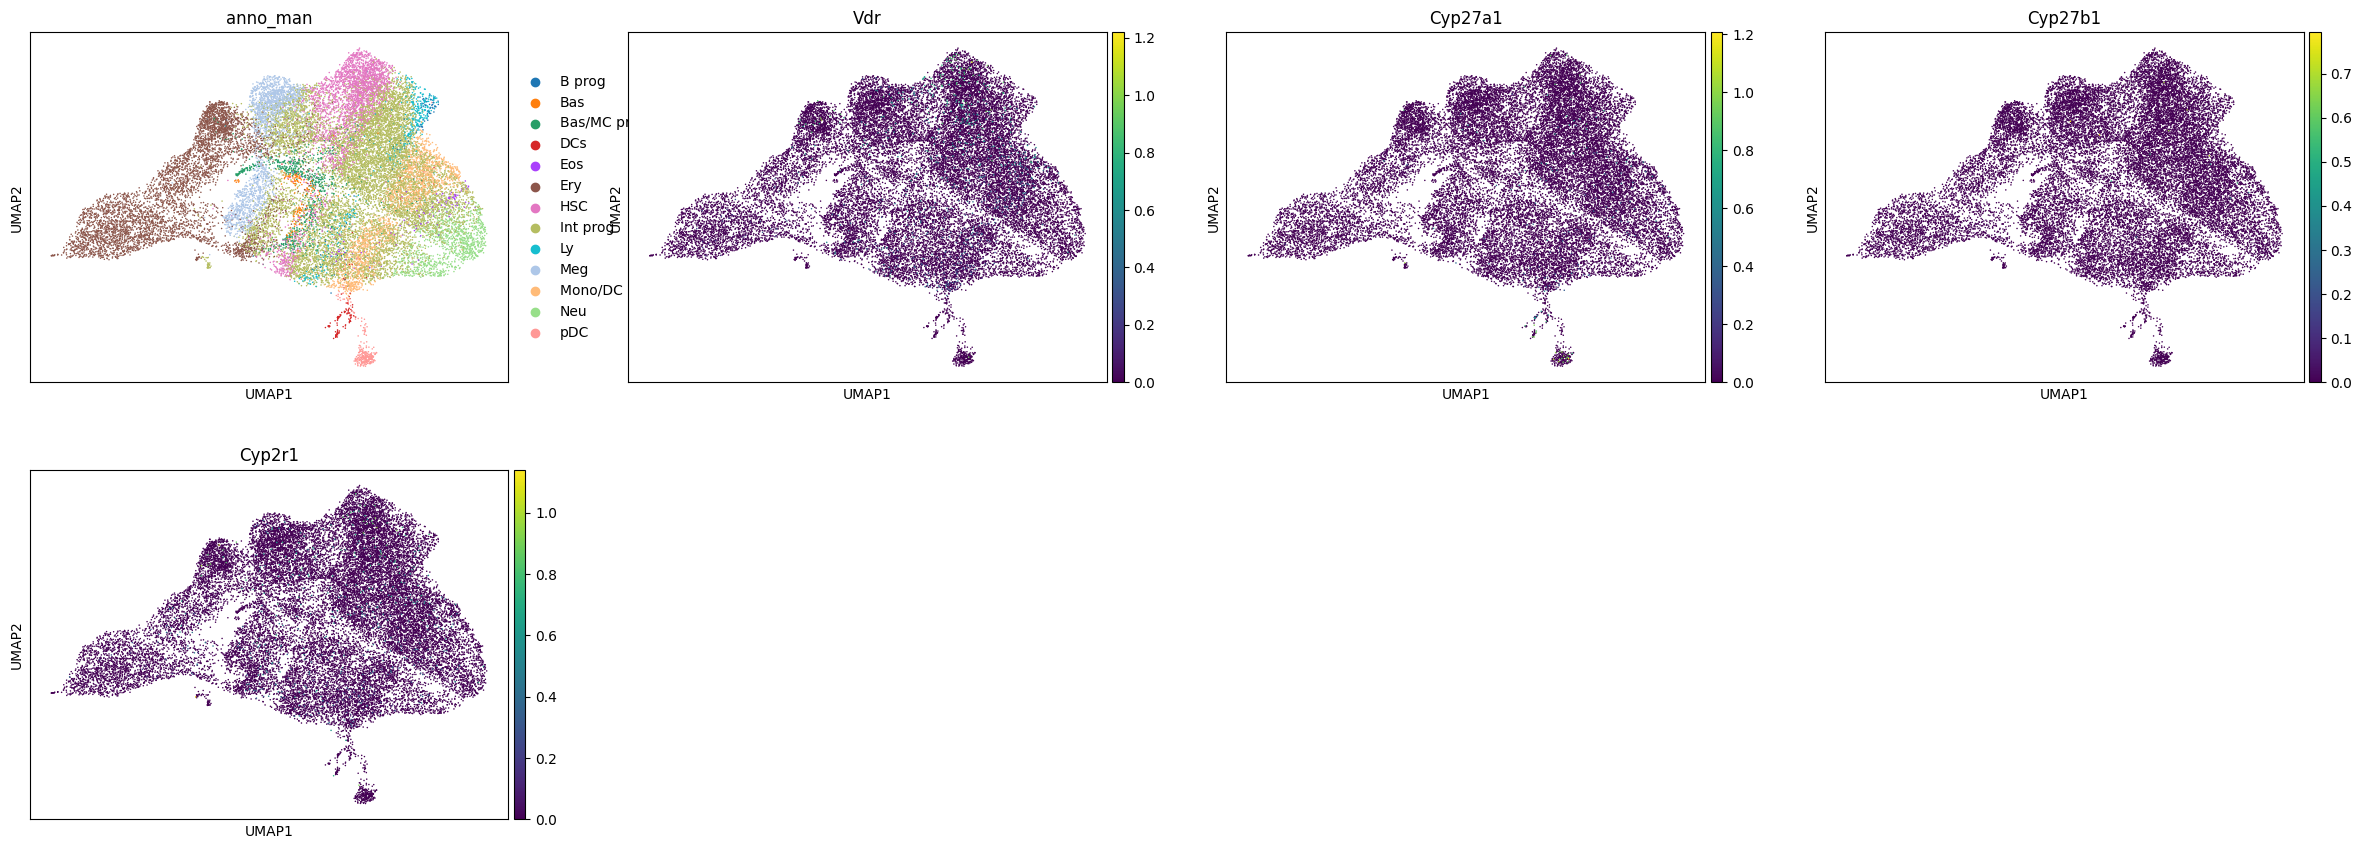

In [19]:
sc.pl.umap(adata_269, color=["anno_man","Vdr", "Cyp27a1", "Cyp27b1", "Cyp2r1"])

In [42]:
sc.tl.rank_genes_groups(adata_269, groupby="anno_man", method="wilcoxon")

In [44]:
# Genes to check
genes_to_check = ["Vdr", "Cyp27a1", "Cyp27b1", "Cyp2r1"]
# Extract the DE results
rank_genes_groups = adata_269.uns["rank_genes_groups"]

# Initialize a dictionary to store the results
significant_genes = {}

# Check each gene in the results
for gene in genes_to_check:
    significant_genes[gene] = {}
    for group in rank_genes_groups['pvals_adj'].dtype.names:
        # Check if the gene is in the names for the current group
        if gene in rank_genes_groups['names'][group]:
            # Get the index of the gene in the names array
            gene_index = list(rank_genes_groups['names'][group]).index(gene)
            # Get the corresponding p-value
            pval = rank_genes_groups['pvals_adj'][group][gene_index]
            # Check if the p-value is below the threshold
            if pval < 0.05:
                significant_genes[gene][group] = pval

# Display the results
for gene, groups in significant_genes.items():
    if groups:
        print(f"{gene} is significant in the following groups (p < 0.05):")
        for group, pval in groups.items():
            print(f"  - {group}: p-value = {pval}")
    else:
        print(f"{gene} is not significant in any group (p < 0.05).")

Vdr is significant in the following groups (p < 0.05):
  - Mono/DC prog: p-value = 0.0006313205334387344
Cyp27a1 is not significant in any group (p < 0.05).
Cyp27b1 is not significant in any group (p < 0.05).
Cyp2r1 is not significant in any group (p < 0.05).


In [24]:
net = dc.get_collectri(organism='human', split_complexes=False)
# Convert adata.var_names to uppercase
adata_269.var_names = adata_269.var_names.str.upper()
dc.run_ulm(
    mat=adata_269,
    net=net,
    source='source',
    target='target',
    weight='weight',
    verbose=True,
    use_raw=False
)

2136 features of mat are empty, they will be removed.
Running ulm on mat with 25313 samples and 19899 targets for 707 sources.


  0%|          | 0/3 [00:00<?, ?it/s]

In [25]:
adata_269.obsm['collectri_ulm_estimate'] = adata_269.obsm['ulm_estimate'].copy()
adata_269.obsm['collectri_ulm_pvals'] = adata_269.obsm['ulm_pvals'].copy()

acts = dc.get_acts(adata_269, obsm_key='ulm_estimate')

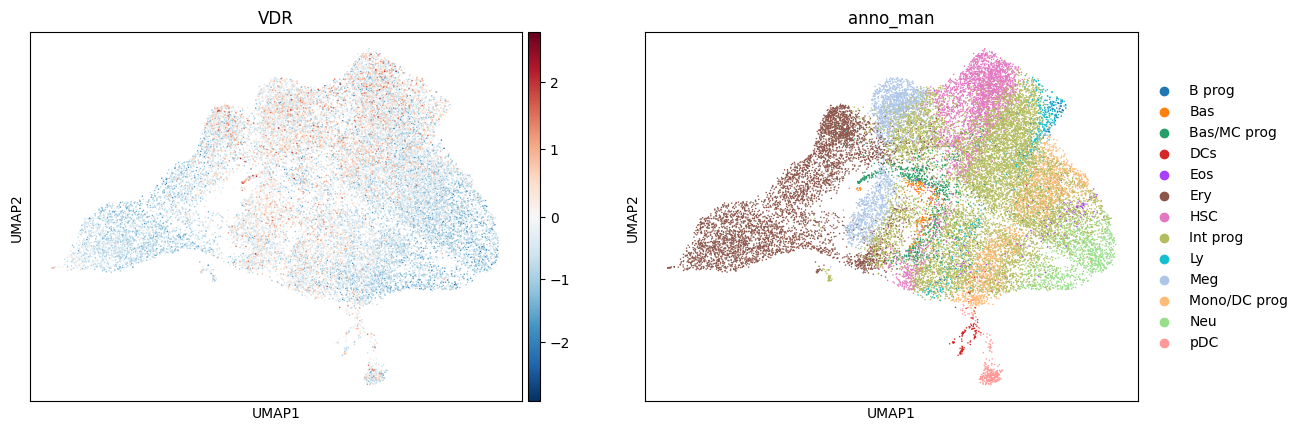

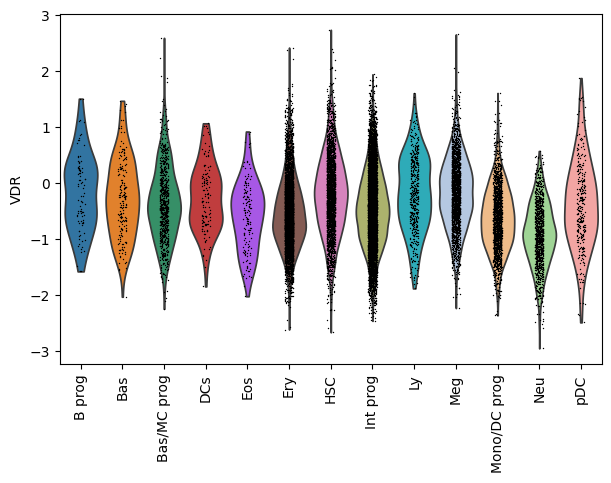

In [26]:
sc.pl.umap(acts, color=['VDR', 'anno_man'], cmap='RdBu_r', vcenter=0)
sc.pl.violin(acts, keys=['VDR'], groupby='anno_man', rotation=90)